# 二, MVDR波束形成

In [96]:
# 读取数据
from speechfunc import read_wave, wave_fft

wave_data, time_table = read_wave("./test/polite.wav")
fft_wave_data, fft_time_table = wave_fft(wave_data, time_table,(1,1.5))

In [97]:
import numpy as np

def traditional_beamforming(wave_data, beamrange=(-1,-1)):
    beam_start, beam_end = beamrange if beamrange != (-1,-1) else (0, len(wave_data[0]))
    a = np.matrix(wave_data[:,beam_start:beam_end])
    w = np.matrix(wave_data[:,beam_end]).T
    B = a.T @ w
    B = np.abs(B) / np.max(np.abs(B))
    return B



C:\Users\Henry\AppData\Local\Temp\ipykernel_7188\433935602.py:8: RuntimeWarning: invalid value encountered in divide
  B = np.abs(B) / np.max(np.abs(B))


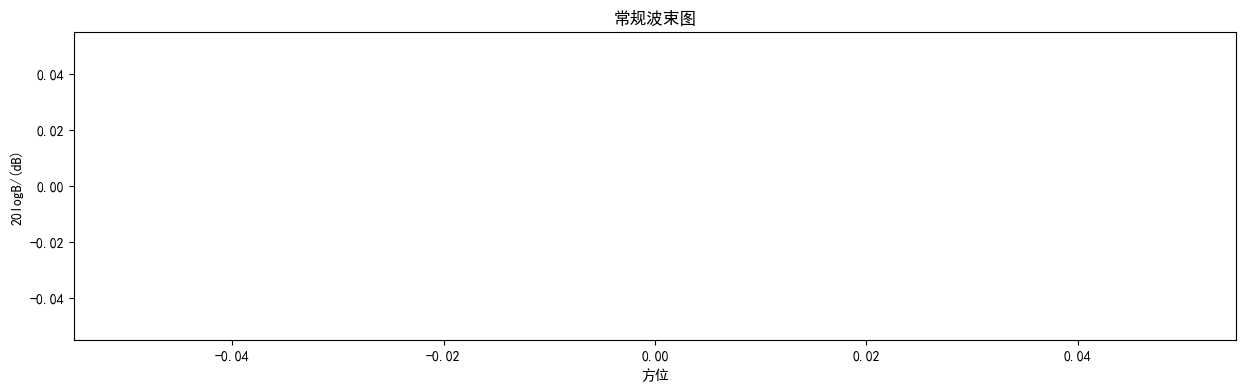

In [98]:
import matplotlib.pyplot as plt

B = traditional_beamforming(wave_data, (1,1801))

theta = np.arange(-90, 90, 0.1).reshape([1, -1]) 
theta = theta / 180 * np.pi # 入射角度

plt.figure(figsize=(15,4))
plt.xlabel('方位')
plt.ylabel('20logB/(dB)')
plt.title('常规波束图')
plt.plot(theta.reshape([-1,1])*180/np.pi, 20 * np.log10(B.reshape([-1,1])), '--')

**常规波束处理**

(2, 22199)


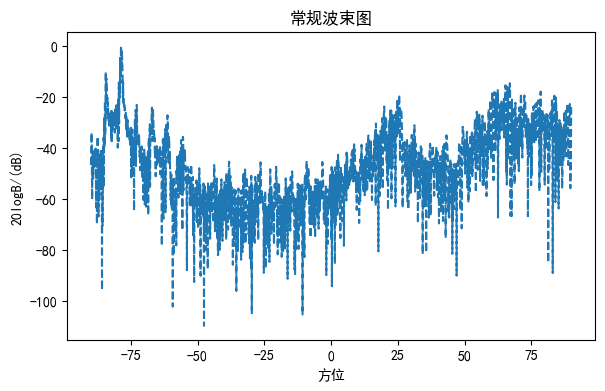

In [99]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 数据读取
data = pd.DataFrame(fft_wave_data)

# 数据提取：响应向量
a = data.iloc[:,:1800]
a = np.matrix(a)

w1 = data.iloc[:,1801:-1]
print(w1.shape)
w1 = np.matrix(w1)

theta = np.arange(-90, 90, 0.1).reshape([1, -1]) 
theta = theta / 180 * np.pi # 入射角度

# 数据提取：加权向量
w = data.iloc[:,1800]
w = np.matrix(w).T

a1 = data.iloc[:,-1]
a1 = np.matrix(a1).T

# 波束形成
B = np.dot(a.T, np.conj(w)) # 波束响应 = wa
B = np.abs(B) / np.max(np.abs(B)) # 波束响应

plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.xlabel('方位')
plt.ylabel('20logB/(dB)')
plt.title('常规波束图')
plt.plot(theta.reshape([-1,1])*180/np.pi, 20 * np.log10(B.reshape([-1,1])), '--')

# # 方位估计
# print(np.transpose(np.conj(w1)).shape)
# print(a1.shape)
# print(np.transpose(np.conj(a1)).shape)
# print(w1.shape)
# sigma = np.transpose(np.conj(w1)) * a1 * np.transpose(np.conj(a1)) * w1
# sigma = np.diag(sigma)
# sigma = sigma / np.max(sigma)

# plt.subplot(1,2,2)
# plt.xlabel('方位')
# plt.ylabel('10logσ^2/(dB)')
# plt.title('波束扫描方位谱')
# plt.plot(theta.reshape([-1,1])*180/np.pi, 10 * np.log10(sigma))

plt.show()

**MVDR波束形成**

In [100]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 

# 数据读取
data1 = pd.read_csv(data_in)

# 数据提取：响应向量
a = data1.iloc[:,:-1]
a = a.applymap(eval)
a = np.matrix(a)

# 数据提取：加权向量
w = data1.iloc[:,-1]
w = [eval(i) for i in w]
w = np.matrix(w).T

# 角度射入阵列
theta = np.arange(-90, 90, 0.1).reshape([1, -1])
theta = theta / 180 * np.pi

# 波束形成
B = w.H * a
B = np.abs(B) / np.max(np.abs(B))

plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.xlabel('方位（^o）')
plt.ylabel('20logB/(dB)')
plt.title('MVDR波束图')
plt.plot(theta.reshape([-1,1])*180/np.pi, 20 * np.log10(B.reshape([-1,1])), '--')

# 方位估计
N = int(N) # 阵元数目
l = int(c) / int(f) # 波长
n = np.arange(0, N, 1).reshape([-1, 1]) 
d = np.array([15]) * np.ones([N, 1]) # 初始化方向矩阵
theta_0 = int(theta_0) / 180 * np.pi # 期望方向
x = np.exp(1j * 2 * np.pi * np.sin(theta_0) * n * d / l) # 信号
Rx = np.mat(1000 * np.dot(x, np.transpose(np.conj(x))) + 1 * np.eye(N)) # 输出信号的功率

sigma = []
for i in range(theta.shape[1]):
    a_theta_0 = np.mat(np.exp(1j * 2 * np.pi * np.sin(theta[:, i]) * n * d / l))
    sigma.append((1 / (a_theta_0.H * Rx.I * a_theta_0)))
    
sigma = np.array(sigma).reshape([-1, 1])
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.xlabel('方位（^o）')
plt.ylabel('10logσ^2/(dB)')
plt.title('MVDR波束扫描方位谱')
plt.plot(theta.reshape([-1,1])*180/np.pi, 10 * np.log10(sigma))

plt.savefig(data_out)
plt.show()

NameError: name 'data_in' is not defined